### NLP Sentiment Analysis Exercise

In [10]:
# import numpy 
import numpy as np 

# import pandas
import pandas as pd 

# import regex
import re

# import nltk
import nltk 

import string

In [3]:
# load data
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv('tweets.csv')

**Task:** Print the top 5 rows.

In [5]:
airline_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Task:** Use the `'text'` column to create an array with the name `'features'`.



In [6]:
features = airline_tweets['text']

In [7]:
features

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

**Task:** Use `'airline_sentiment'` column to create an array with the name `'labels'`.

In [8]:
labels = airline_tweets['airline_sentiment']

In [9]:
labels

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

**Task:** Clean the text data in the `'features'` array.

    - Remove all the special characters.
    - Remove all single characters.
    - Remove single characters from the start.
    - Substituting multiple spaces with single space.
    - Converting all text to lowercase.

In [18]:
processed_features = []

for sentence in features:
    # Remove all the special characters
    sentence = re.sub(r'''[\*\~]+''', "", sentence)

    # Remove all single characters
    sentence = re.sub(r"/(?<!\S).(?!\S)\s*/", "", sentence)


    # Remove single characters from the start
    

    # Substituting multiple spaces with single space
    sentence = re.sub(r'\s+', ' ', sentence)

    # Converting to Lowercase
    sentence = sentence.lower()
    processed_features.append(sentence)
    

**Task:** Import stopwords from nltk.

In [19]:
# Import the NLTK package and download the necessary data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# view the stopwords
stopwords.words()

#view english stopwords
engstopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bevli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Task:** Import TfidfVectorizer from sklearn.

In [20]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Task:** Instatiate TfidfVectorizer with following parameters:

    - max_features = 2500
    - min_df = 7
    - max_df = 0.8
    - stop_words = stopwords.words('english')
    
    


In [21]:
tfidfv = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8,
                         stop_words = stopwords.words('english'))

**Bonus:** How would you determine optimal paraemeters for TfidfVectorizer? Discuss with your peers and/or mentors. Write down your answer below.

**Task:** Transform features with vectorizer. 

In [23]:
processed_features_ = tfidfv.fit_transform(processed_features)


**Task:** Import train_test_split from sklearn and split the data.

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features_,labels,train_size=0.7,random_state=123)


**Task:** Import any classifier of your choice from sklearn (e.g. Random Forest, LogReg, Naive Bayes).

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

**Task:** Fit your classifier to data.

In [28]:
lr.fit(x_train, y_train)

LogisticRegression()

**Task:** Predict X_test.

In [49]:
y_pred = lr.predict(x_test)
unique, counts  = np.unique(y_pred, return_counts = True)
dict(zip(unique, counts))

{'negative': 3209, 'neutral': 637, 'positive': 546}

**Task:** Import confusion matrix and accuracy_score.

In [35]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

**Task:** Print confusion matrix.

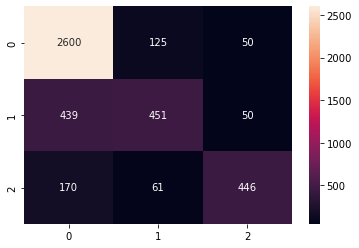

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation


**Task:** Print accaccuracy_score.

In [36]:
acc = accuracy_score(y_test,y_pred)
print(acc)
print(classification_report(y_test,y_pred))

0.7962204007285975
              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      2775
     neutral       0.71      0.48      0.57       940
    positive       0.82      0.66      0.73       677

    accuracy                           0.80      4392
   macro avg       0.78      0.69      0.72      4392
weighted avg       0.79      0.80      0.78      4392

